<a href="https://colab.research.google.com/github/Tanish-Sarkar/Elite-Transformers/blob/main/Module1%20-%20Transformer%20Fundamentals/Sinusoidal_Positional_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import math

In [3]:
def positional_encoding(seq_len, d_model):
  """
   Creates fixed sinusoidal positional encodings
   Returns: tensor of shape (1, seq_len, d_model)
  """
  position = torch.arange(seq_len).unsqueeze(1).float()
  div_team = torch.exp(torch.arange(0, d_model,2).float() *
                       (-math.log(10000.0) / d_model))

  pe = torch.zeros(seq_len, d_model)

  pe[:, 0::2] = torch.sin(position * div_team)
  pe[:, 1::2] = torch.cos(position * div_team)

  return pe.unsqueeze(0)

**test**

In [5]:
seq_len = 10
d_model = 64

pe = positional_encoding(seq_len, d_model)
print("Positional Encoding:", pe.shape)

Positional Encoding: torch.Size([1, 10, 64])


**visualize first few positions**

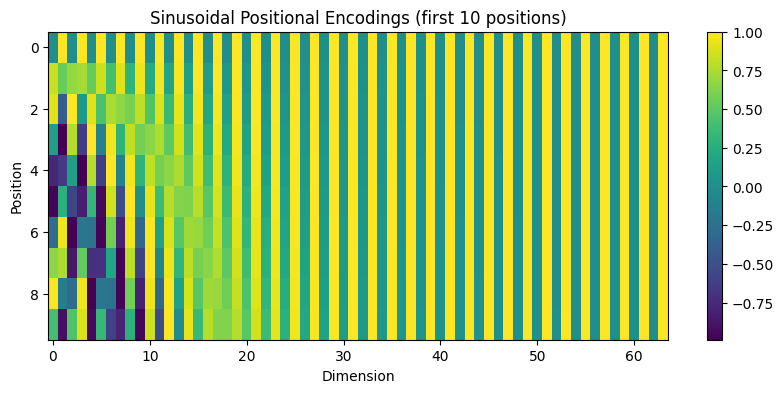

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.imshow(pe[0, :, :].numpy(), aspect='auto', cmap='viridis')
plt.title("Sinusoidal Positional Encodings (first 10 positions)")
plt.xlabel("Dimension")
plt.ylabel("Position")
plt.colorbar()
plt.show()

### Combine token + positional embeddings

In [9]:
# Fake data
batch_size = 4
seq_len = 12
vocab_size = 5000

# random token ids
tokens = torch.randint(0, vocab_size, (batch_size, seq_len))

# embedding
token_model = nn.Embedding(vocab_size, d_model)
tok_emb = token_model(tokens)

# Postional
pos_emb = positional_encoding(seq_len, d_model)

# combine
x = tok_emb + pos_emb

print("Final input to transformer shape:", x.shape)

Final input to transformer shape: torch.Size([4, 12, 64])
